In [10]:
from numpy import arange, zeros
import matplotlib.pyplot as plt

In [11]:
def membrana(V, Er, tau, RI):
    return  ((Er-V) + RI)/tau

def pulso_retangular(t, t0, tf, amplitude):
    pulso = zeros(len(t))
    pulso[(t >= t0) & (t <= tf)] = amplitude
    return pulso

In [12]:
def integra_e_dispara_pulsos(pulsos = []):
    ######
    # Parâmetros da membrana
    ######
    tau = 10  # constante temporal da membrana (ms)
    Er = -70  # potencial de repouso da membrana (mV)
    limiar = -50  # limiar para disparo de PA (mV)
    reset = -75  # valor para reinício de Vm após PA (mV)

    ######
    # Parâmetros de integração
    ######
    passo = 0.01  # passinho de tempo
    n_passos = 20000  # quantos passinhos dar
    V_inicial = Er  # valor do potencial V para tempo = 0


    # Cria espaço para armazenar Vm 
    V = zeros(n_passos)
    V[0] = V_inicial  # condição inicial
    
    # Lista dos passos em que ocorrem potenciais de ação
    disparos = []
    
    # Tempo
    t = arange(n_passos) * passo
    
    # Estímulo: soma de pulsos retangulares, armazenados numa lista
    #           contendo dicionários que definem cada pulso
    I = sum(pulso_retangular(t, p['inicio'], p['fim'], p['amplitude']) 
                             for p in pulsos)  
    
    for i in range(n_passos - 1):
        V[i + 1] = V[i] + passo * membrana(V[i], Er, tau, I[i])  # Passo Euler
        
        if V[i + 1] >= limiar:  # condição para ocorrência de PA
            V[i + 1] = reset  # Se ocorreu PA, reiniciamos o potencial de membrana
            disparos.append(i)  # Armazenda o i de ocorrência do PA
    
    return t, V, I, disparos



<IPython.core.display.Javascript object>


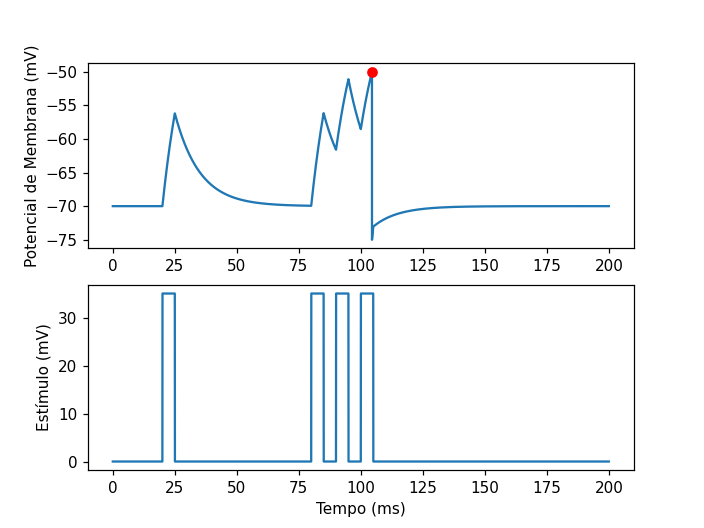

Text(0, 0.5, 'Estímulo (mV)')

In [13]:
# Vamos criar três pulsos retangulares.
# Cada pulso é definido como um dicionário (definido usando {})
# Cada dicionário contém o inicio e o fim do pulso (ms), e sua amplitude (mV).
pulsos = [
    {'inicio': 20, 'fim': 25, 'amplitude': 35},
    {'inicio': 80, 'fim': 85, 'amplitude': 35},
    {'inicio': 90, 'fim': 95, 'amplitude': 35},
    {'inicio': 100, 'fim': 105, 'amplitude': 35}
]

# Simulamos o modelo Integra e Dispara com o estímulo definido acima
# Ela retorna 4 listas: tempo, potencial de membrana, estímulo e disparos.
t, V, I, disparos = integra_e_dispara_pulsos(pulsos)

# Série temporal de V, com bolinhas nos disparos
plt.subplot(211) # Faremos um gráfico com dois painéis, esse é o primeiro
plt.plot(t, V)
plt.ylabel('Potencial de Membrana (mV)')
plt.plot(t[disparos], V[disparos], 'or')


# Série temporal do estímulo
plt.subplot(212) # Faremos um gráfico com dois painéis, esse é o segundo
plt.plot(t, I)
plt.xlabel('Tempo (ms)')
plt.ylabel('Estímulo (mV)')

